In [30]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

REPORT_FILE_PATH = Path('../llm-answer-results/reports')
FIGURE_FILE_PATH = Path('../llm-answer-results/figures/')
sns.set_theme()

In [31]:
def load_reports(type='llm_auto', date='2023-10-18'):
    overall_df = None

    for llm_type in ['gpt', 'llama', 'vicuna']:
        df = pd.read_csv(REPORT_FILE_PATH / date / f'{llm_type}_{type}_score.csv')
        df['llm_type'] = llm_type
        df['question_id'] = df.index
        if overall_df is None:
            overall_df = df
        else:
            overall_df = pd.concat([overall_df, df])

    overall_df = overall_df.reset_index()

    return overall_df

In [32]:
auto_df = load_reports(type='llm_auto', date='2023-11-25')

In [33]:
auto_df.to_csv('../llm-answer-results/robojudge_auto_results.csv')

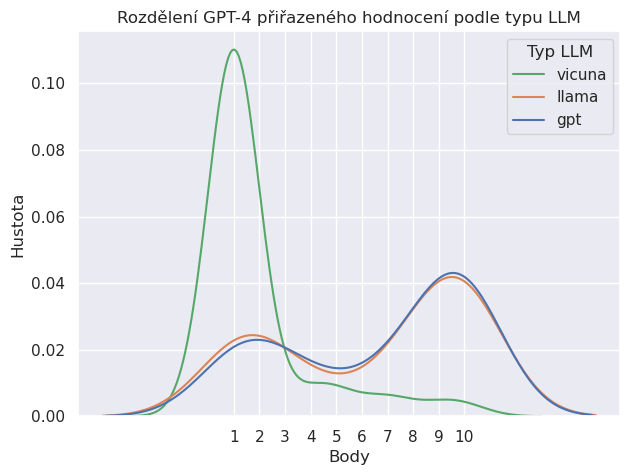

In [34]:
f, ax = plt.subplots(figsize=(7, 5))
# sns.despine(f)

ax.set_xticks(range(1,11))
ax.set_xlabel('Body')
ax.set_ylabel('Hustota')
g =sns.kdeplot(auto_df, x='score', hue='llm_type').set_title('Rozdělení GPT-4 přiřazeného hodnocení podle typu LLM').set
plt.legend(title='Typ LLM', labels=['vicuna', 'llama', 'gpt'])

plt.savefig(FIGURE_FILE_PATH / 'auto_kde.png')

In [35]:
result_table = auto_df.groupby('llm_type')['score'].describe()
result_table['std'] = result_table['std'].round(2)
result_table.rename(columns={'count': 'počet', 'mean': 'průměr', 'std': 'směrodatná odchylka', '50%': 'medián'}, inplace=True)
result_table.index.names = ['typ LLM']
result_table[['počet', 'průměr', 'směrodatná odchylka', 'medián']].to_csv(FIGURE_FILE_PATH/'auto_score_by_type.csv')

In [36]:
auto_df.groupby('llm_type')['score'].median()

llm_type
gpt       8.5
llama     8.0
vicuna    1.0
Name: score, dtype: float64

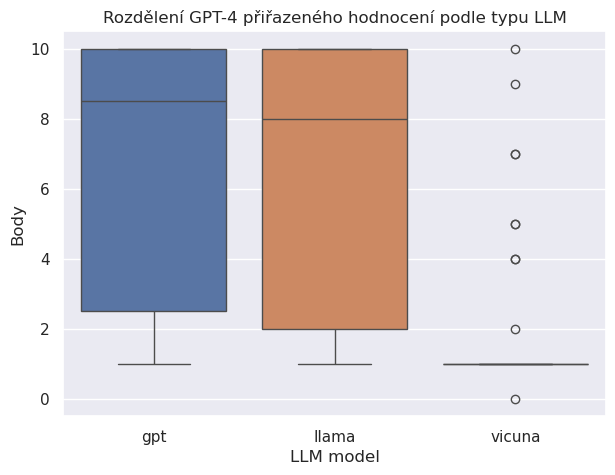

In [37]:
f, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(data=auto_df, y='score', x='llm_type', hue='llm_type', width=0.8).set_title('Rozdělení GPT-4 přiřazeného hodnocení podle typu LLM')

ax.set_ylabel('Body')
ax.set_xlabel('LLM model')
# plt.legend(title='Typ LLM')

plt.savefig(FIGURE_FILE_PATH / 'auto_boxplot.png')

In [38]:
score_by_question = auto_df.groupby('question_id').aggregate({'score': np.sum, 'question': lambda x: x})

score_by_question = score_by_question.sort_values('score')

score_by_question.to_csv('../llm-answer-results/figures/score_by_question.csv')

---

In [39]:
bert_overall_df = load_reports(type='bert')

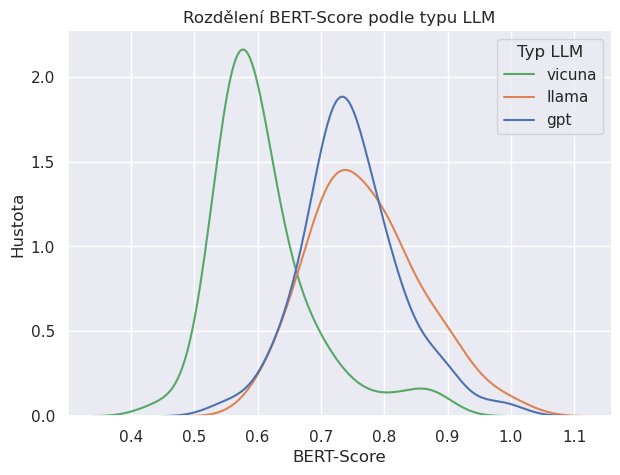

<Figure size 640x480 with 0 Axes>

In [40]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax.set_xlabel('BERT-Score')
ax.set_ylabel('Hustota')

sns.kdeplot(bert_overall_df, x='score', hue='llm_type').set_title('Rozdělení BERT-Score podle typu LLM')
plt.legend(title='Typ LLM', labels=['vicuna', 'llama', 'gpt'])
plt.show(g)

plt.savefig(FIGURE_FILE_PATH / 'bert_kde.png')

In [41]:
bert_overall_df.groupby('llm_type')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
llm_type,,,,,,,,
gpt,50.0,0.748921,0.077664,0.555620,0.705268,0.736102,0.789416,0.984493
llama,50.0,0.770814,0.086373,0.608374,0.715692,0.755372,0.822560,1.000000
vicuna,50.0,0.610236,0.081791,0.452058,0.562228,0.585067,0.629456,0.877847


In [42]:
result_table = bert_overall_df.groupby('llm_type')['score'].describe()
result_table['std'] = result_table['std'].round(2)
result_table['mean'] = result_table['mean'].round(2)
result_table['50%'] = result_table['50%'].round(2)
result_table.rename(columns={'count': 'počet', 'mean': 'průměr', 'std': 'směrodatná odchylka', '50%': 'medián'}, inplace=True)
result_table.index.names = ['typ LLM']
result_table[['počet', 'průměr', 'směrodatná odchylka', 'medián']].to_csv(FIGURE_FILE_PATH/'bert_score_by_type.csv')

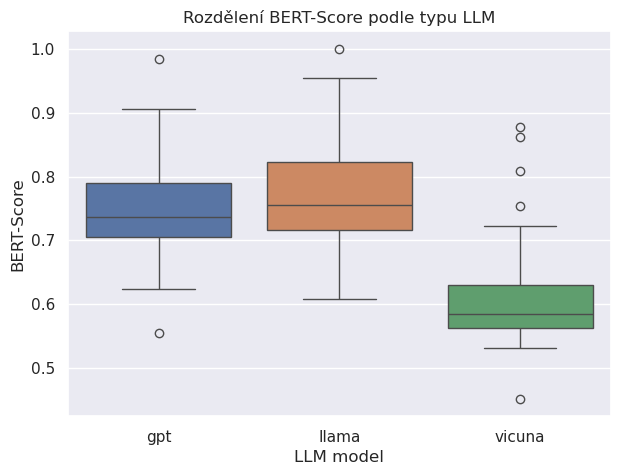

In [43]:
f, ax = plt.subplots(figsize=(7, 5))


# sns.kdeplot(bert_overall_df, x='score', hue='llm_type').set_title('Rozdělení BERT-Score podle typu LLM')

sns.boxplot(data=bert_overall_df, y='score', hue='llm_type', x='llm_type', width=0.8, ax=ax).set_title('Rozdělení BERT-Score podle typu LLM')
ax.set_ylabel('BERT-Score')
ax.set_xlabel('LLM model')

plt.savefig(FIGURE_FILE_PATH / 'bert_boxplot.png')